In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.integrate as spint

## Ep.1: 3-card poker

*Approach:*
First I make a function that creates a deck of cards. Cards are represented as 2-tuples, with the first value being the rank (0 - 12) and the second the suit (0 - 3). Then I return n_cards sampled out of the deck. For the begining of the exercise n_cards=3, but for the last part it should be the whole deck (52). With this set up, I create two functions that check whether the hand returned is straight or flush (or straight-flush when both return true). After this, I simulate a large number N=1e6 of hands and check how many of each special case there are. The same is done to check the statistics of the last hand dealt.

In [2]:
def deal_hand(n_cards=3):
    '''Creates deck of cards and returns n_cards unique samples. Cards are represented as 2-tuples'''
    deck = [(rank, suit) for rank in range(13) for suit in range(4)]
    hand = random.sample(deck, n_cards)
    return hand

In [3]:
# tests
hand1 = deal_hand(n_cards=3)
hand2 = [(5, 1), (6, 0), (4, 1)]
hand3 = [(5, 3), (6, 3), (4, 3)]
print(hand1)

[(3, 1), (2, 2), (6, 3)]


In [4]:
def straight_check(hand):
    '''Checks if the hand provided is a straight'''
    ranks = sorted([hand[i][0] for i in range(len(hand))]) # Sort in ascending rank order
    for i in range(len(ranks)-1):
        if len(ranks) == len(set(ranks)): # Check for repeats
            if ranks[-1] - ranks[0] == len(ranks)-1: # Check for consecutives
                return True
            else:
                return False
        else:
            return False
        
def flush_check(hand):
    '''Checks if the hand provided is a flush'''
    suits = [hand[i][1] for i in range(len(hand))]
    if len(set(suits)) == 1: # Check for repeats
        return True
    else:
        return False
        
# tests    
print(straight_check(hand1))
print(straight_check(hand2))
print(flush_check(hand3))

False
True
True


In [5]:
def hand_probability(N, check_type):
    '''Calculates probability of getting specified hand type'''
    true_inst = 0
    for i in range(int(N)):
        hand = deal_hand()
        if check_type == 'straight':
            if straight_check(hand):
                true_inst += 1
        elif check_type == 'flush':
            if flush_check(hand):
                true_inst += 1
        elif check_type == 'straight flush':
            if straight_check(hand) and flush_check(hand):
                true_inst += 1
    return true_inst/N    

def last_hand_probability(N, check_type):
    '''Calculates probability of getting specified hand type when dealt last hand'''
    true_inst = 0
    for i in range(int(N)):
        hand = deal_hand(n_cards=52)[-3:]
        if check_type == 'straight':
            if straight_check(hand):
                true_inst += 1
        elif check_type == 'flush':
            if flush_check(hand):
                true_inst += 1
        elif check_type == 'straight flush':
            if straight_check(hand) and flush_check(hand):
                true_inst += 1
    return true_inst/N    

In [6]:
p_straight = hand_probability(1e6, 'straight')
p_flush = hand_probability(1e6, 'flush')
p_straight_flush = hand_probability(1e6, 'straight flush')

In [7]:
print('Probability of flush:', p_flush)
print('Probability of straight:', p_straight)
print('Probability of straight flush:', p_straight_flush)

Probability of flush: 0.052164
Probability of straight: 0.032115
Probability of straight flush: 0.001974


In [8]:
p_straight_last = last_hand_probability(1e6, 'straight')
p_flush_last = last_hand_probability(1e6, 'flush')
p_straight_flush_last = last_hand_probability(1e6, 'straight flush')

In [9]:
print('Probability of flush in last hand:', p_flush_last)
print('Probability of straight in last hand:', p_straight_last)
print('Probability of straight flush in last hand:', p_straight_flush_last)

Probability of flush in last hand: 0.051737
Probability of straight in last hand: 0.031634
Probability of straight flush in last hand: 0.001942


Being dealt the last hand does not change the odds.

*Summary:*
The probability of getting either a flush, a straight, or a straight-flush in 3-card poker is unaffected by whether you are dealt first or last.

## Ep. 2: Distributions of discrete measurements

*Approach:*
For situation a, I draw n_trials random variates from a binomial distribution using theta and n_samp_a to define it. For situation b, first I have to distribute the n_samps_b as a Poisson distribution with $\lambda=10$. With this distribution, I draw random variates of a binomial distribution defined by n_samp_b defined in the previous Poisson distribution. To visualize the results, I plot the obtained histogram values along with both a Binomial distribution and a Poisson distribution with the parameters given in the exercise. 

In [10]:
theta = 0.7
n_trials = int(1e6)

# situation a
n_samp_a = 10
bn_vars_a = sps.binom.rvs(n=n_samp_a,p=theta,size=n_trials)
# To create histogram
bins_a = np.bincount(bn_vars_a)
x_a = np.arange(max(bn_vars_a)+1)

In [11]:
# situation b
n_samps_b = sps.poisson.rvs(mu=10, size=n_trials)
bn_vars_b = []
for n_samp_b in n_samps_b:
    bn_vars_b.append(sps.binom.rvs(n=n_samp_b,p=theta))
# To create histogram
bins_b = np.bincount(bn_vars_b)
x_b = np.arange(max(bn_vars_b)+1)

In [12]:
pmf_bn = sps.binom.pmf(x_a, n_samp_a, p=theta)
pmf_po = sps.poisson.pmf(x_b, mu=7)

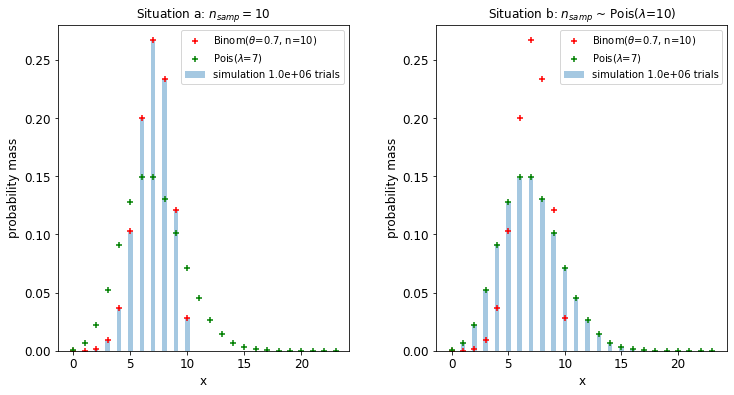

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
fig.subplots_adjust(wspace=0.3)


trials = "{:.1e}".format(n_trials)
ax1.bar(x_a, bins_a/n_trials, width=0.4, alpha=0.4, label=f'simulation {trials} trials')
ax1.set_title('Situation a: $n_{samp}=10$')
ax2.bar(x_b, bins_b/n_trials, width=0.4, alpha=0.4, label=f'simulation {trials} trials')
ax2.set_title('Situation b: $n_{samp}$ ~ Pois($\lambda$=10)')
for ax in (ax1,ax2):
    ax.scatter(x_a, pmf_bn, color='r', marker='+', label=r'Binom($\theta$=0.7, n=10)')
    ax.scatter(x_b, pmf_po, color='g', marker='+', label='Pois($\lambda$=7)')
    ax.tick_params(labelsize=12)
    ax.set_xlabel("x", fontsize=12)
    ax.set_ylabel("probability mass", fontsize=12)
    ax.legend()
plt.show()

Since $n_{samp}$ ~ Pois($\lambda=10$), $E[n_{samp}]=10$. Then, these are distributed Binomialy. We know that for a binomial distribution, $E[X]=n_{samp}\theta$. We know $\theta=0.7$, multiplied by the expected $n_{samp}$ value from above we obtain the observed $\lambda=7$.

*Summary:*
In situation a, where $n_{samp}=10$, the simulation returns a minomial distribution with the expected parameters. For situation b, however, the simulation yields a slightly less obvious Poisson distribution with $\lambda=7$. After some consideration, we see that this also makes sense, as explained in the paragraph above.

## Ep. 3: The central limit theorem applied to skewed distributions

*Approach:*
I repeat what was done in the carpentry example, but using a lognormal distribution. The lognorm_sum function makes the additions, and the lognorm_sum_ratio compares the resulting distributions with a normal.

In [14]:
def lognorm_sum(s, m):
    '''Adds n_samp numbers from a lognormal distribution with s, m, n_trial times'''
    n_trials = 10000
    n_samp = [2,4,8,16,32,64,128,256,512,1024,2048,4096]

    dist = sps.lognorm(loc=0, scale=m, s=s)

    dist_var = dist.var()
    dist_mean = dist.mean()

    n = 0
    fig, ax = plt.subplots(4,3, figsize=(12,10))
    fig.subplots_adjust(wspace=0.3,hspace=0.3)

    for i in range(4):
        for j in range(3):
            dist_rand = dist.rvs(size=(n_trials,n_samp[n]))
            exp_var = n_samp[n]*dist_var
            exp_mean = n_samp[n]*dist_mean

            plot_range = (exp_mean-4*np.sqrt(exp_var),exp_mean+4*np.sqrt(exp_var))

            xvals = np.linspace(plot_range[0],plot_range[1],200)
            ### Are we supposed to show s and k for original distribution? Or for sum of n random values???
            dist_bin, edges = np.histogram(np.sum(dist_rand,axis=1))
            skew = round(sps.skew(dist_bin),1)
            kurtosis = round(sps.kurtosis(dist_bin),1)
            
            ax[i,j].hist(np.sum(dist_rand,axis=1), bins=50, range=plot_range, density=True, alpha=0.5)
            ax[i,j].plot(xvals,sps.norm.pdf(xvals,loc=exp_mean,scale=np.sqrt(exp_var)))
            ax[i,j].text(0.03,0.85,"$n=$"+str(n_samp[n]), transform=ax[i,j].transAxes)
            ax[i,j].text(0.6,0.85, f's, k={skew}, {kurtosis}', transform=ax[i,j].transAxes)
            n = n + 1

            if j == 0:
                ax[i,j].set_ylabel('prob. density')
            if i == 2:
                ax[i,j].set_xlabel("sum of $n$ variates")
    plt.show()

def lognorm_sum_ratio(s, m):
    '''Calculates ratio of sum of two numbers from distribution to normal distribution'''
    n_trials = 100000
    n_samp = [2,4,8,16,32,64,128,256,512,1024,2048,4096]
    
    dist = sps.lognorm(loc=0, scale=m, s=s)

    dist_var = dist.var()
    dist_mean = dist.mean()

    n = 0
    fig, ax = plt.subplots(4,3, figsize=(12,10))
    fig.subplots_adjust(wspace=0.3,hspace=0.3)
    
    for i in range(4):
        for j in range(3):
            dist_rand = dist.rvs(size=(n_trials,n_samp[n]))
            exp_var = n_samp[n]*dist_var
            exp_mean = n_samp[n]*dist_mean
            nd = sps.norm(loc=exp_mean,scale=np.sqrt(exp_var))
            plot_range = (exp_mean-4*np.sqrt(exp_var),exp_mean+4*np.sqrt(exp_var))
            
            dens, edges = np.histogram(np.sum(dist_rand,axis=1), bins=50, range=plot_range, density=True)
            norm_pdf = (nd.cdf(edges[1:])-nd.cdf(edges[:-1]))/np.diff(edges)

            ax[i,j].hist((edges[1:]+edges[:-1])/2,bins=edges,weights=dens/norm_pdf,density=False,
                         histtype='step')
            ax[i,j].text(0.03,0.85,"$n=$"+str(n_samp[n]),transform=ax[i,j].transAxes)
            n = n + 1
            if j == 0:
                ax[i,j].set_ylabel('ratio')
            if i == 2:
                ax[i,j].set_xlabel("sum of $n$ variates")
    plt.show()

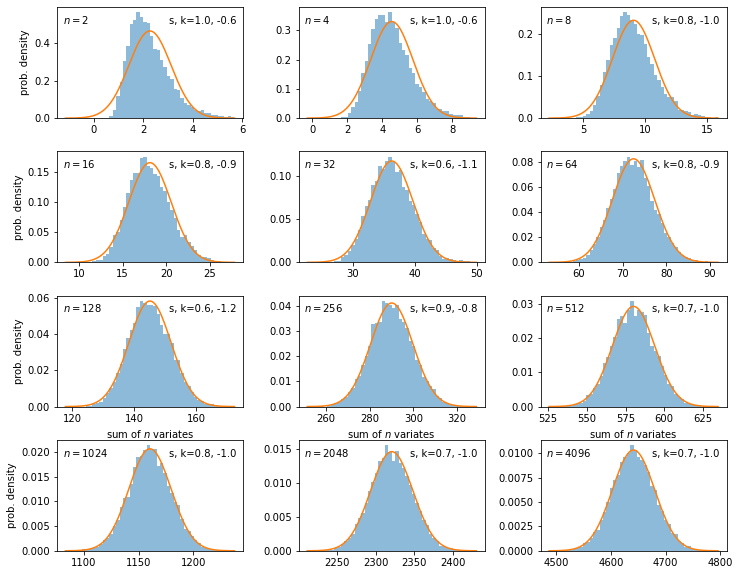

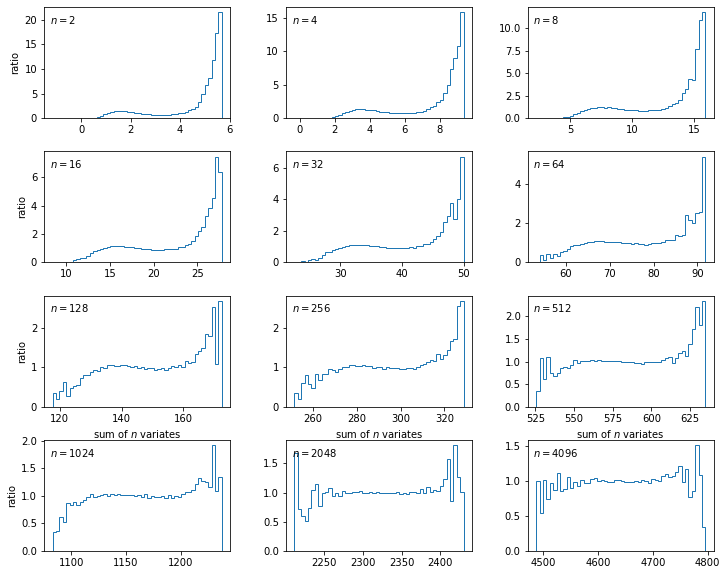

In [15]:
lognorm_sum(0.5, 1)
lognorm_sum_ratio(0.5, 1)

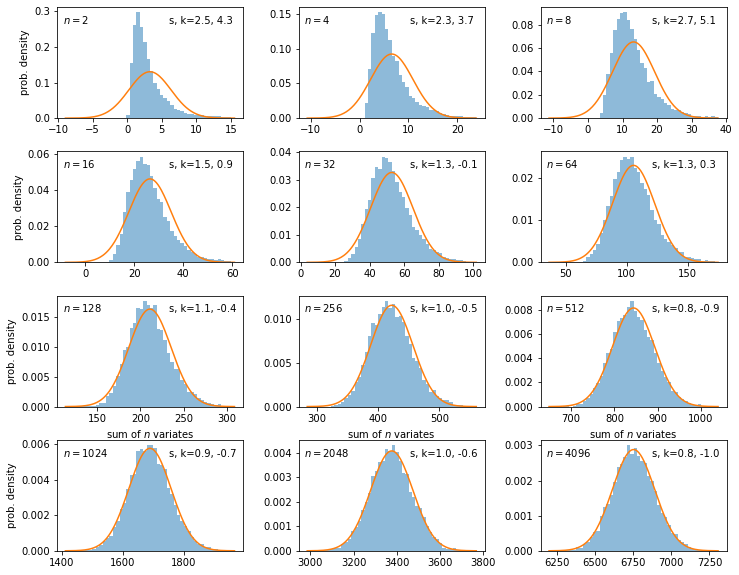

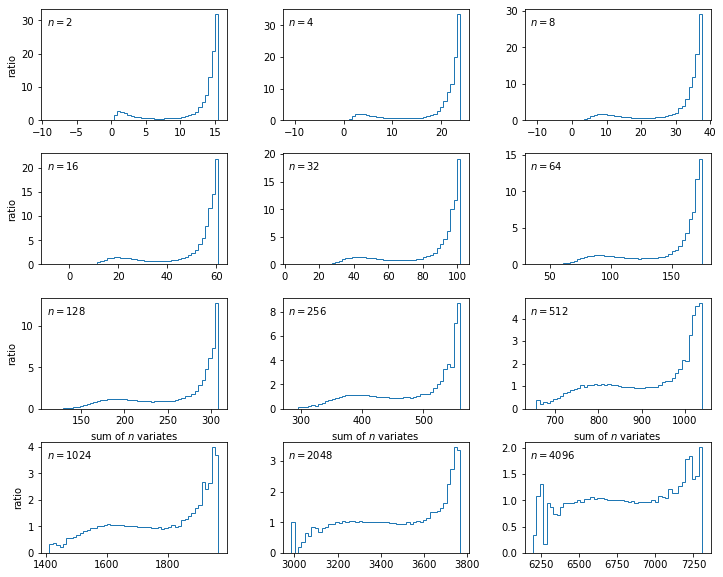

In [16]:
lognorm_sum(1, 1)
lognorm_sum_ratio(1, 1)

The more skewed the original distribution is, the longer it takes to reach a normal distribution

*Conclusion:*
We see for both cases that the ratios become flatter with higher values of n. This means (as is also apparent in the probability density plots) that with more values added, the distribution resembles more a normal distribution. The rate at which this happens is different, however, between the two examples given. With the skew and kurtosis (and also by just looking at the plots) we can see that for initial distributions that are less skewed (s=0.5), the normal is reached with less values summed. In other words, it is reached faster than for the more skewed distribution.

## Ep. 4: Demonstrating the multivariate Central Limit Theorem with a 3D plot

*Approach:*
To plot the data, I simply set up a scatter plot and two histograms with their respective values. Then, I made a function that returns the means in x and y and the covariance of inputted data. Simulating a large number of trials, each with nsamp values, I can obtain their means and add them to two lists, to create a new distribution of means. This distribution can be visualized in a 2D histogram. The 2D histogram data can also be visualized along with a theoretical bivariate normal in a meshgrid plot, along with the difference between the two to visualize the residuals. 

In [17]:
nsamp = int(1e6)
x_dist = sps.lognorm.rvs(loc=1,s=0.5,size=nsamp)
y_dist = np.sqrt(x_dist)+sps.norm.rvs(scale=0.3,size=nsamp)

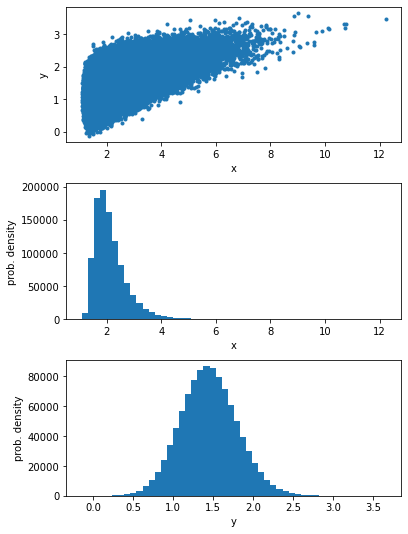

In [18]:
fig, ax = plt.subplots(3,1, figsize=(6,9))
fig.subplots_adjust(wspace=0.3,hspace=0.3)

ax[0].scatter(x_dist,y_dist, marker='.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].hist(x_dist, bins=50)
ax[1].set_xlabel('x')
ax[1].set_ylabel('prob. density')
ax[2].hist(y_dist, bins=50)
ax[2].set_xlabel('y')
ax[2].set_ylabel('prob. density')

plt.show()

In a multivariate normal distribution, the histograms of both x and y should be univariate normal distributions. In this case, x is not normally dstributed

In [19]:
def find_mus_and_covs(x,y):
    '''Returns means and covariance of x and y variates'''
    mu_x = np.mean(x)
    mu_y = np.mean(y)
    # cov are the off-diagonal elements of the cov matrix
    cov_matrix = np.cov([x,y])
    cov = cov_matrix[0][1]
    return mu_x, mu_y, cov
    
mu_x, mu_y, cov = find_mus_and_covs(x_dist,y_dist)
print(f'Means of variates for x and y are {mu_x} and {mu_y} respectively. Covariance is {cov}.')

Means of variates for x and y are 2.1339512600650967 and 1.448169784404038 respectively. Covariance is 0.11586818106712785.


In [20]:
def means_and_hist(n_trials, nsamp):
    '''Finds means of (n_trials*nsamp) with given distribution and returns them, along with 2d histogram values'''
    n_trials = int(n_trials)
    nsamp = int(nsamp)
    # find means for random samples of nsamp, n_trials times
    x = sps.lognorm.rvs(loc=1,s=0.5,size=(n_trials, nsamp))
    y = np.sqrt(x)+sps.norm.rvs(scale=0.3,size=(n_trials, nsamp))
    l_mu_xs = np.mean(x, axis=1)
    l_mu_ys = np.mean(y, axis=1)

    densities, xedges, yedges = np.histogram2d(l_mu_xs, l_mu_ys, bins=100, density=True)
    return l_mu_xs, l_mu_ys, densities, xedges, yedges

In [21]:
def plot_histogram(n_trials, nsamp):
    '''Plots the histogram of the means of n_trials runs, and also plots the modelled bivariate normal distribution.
    Second graph shows difference between the means and the modelled distribution'''
    mu_xs, mu_ys, densities, xedges, yedges = means_and_hist(n_trials, nsamp)
    
    # Create bivariate normal distribution using the means
    MU_x, MU_y, COV = find_mus_and_covs(mu_xs, mu_ys)
    COV_mat = np.cov([mu_xs, mu_ys])
    # Create bivariate normal with the obtained means and covariance matrix
    bvn = sps.multivariate_normal([MU_x, MU_y], COV_mat)

    # Create grid for calculating bvn
    xgrid, ygrid = np.meshgrid((xedges[1:]+xedges[:-1])/2, (yedges[1:]+yedges[:-1])/2, indexing='ij')
    xypos = np.dstack((xgrid, ygrid))

    # Calculate joint pdf and marginal integrated pdfs
    xypdf = bvn.pdf(xypos)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # Plot the joint pdf as a wireframe:
    ax.plot_wireframe(xgrid, ygrid, xypdf, rstride=5, cstride=5, alpha=0.7, color='black',
                      linewidth=0.7, label='Bivariate normal pdf')
    # Plot the histogram2d means as a wireframe
    ax.plot_wireframe(xgrid, ygrid, densities, rstride=2, cstride=2, alpha=0.7, color='green', 
                      linewidth=0.5, label='Histogram of means')

    # Plot labels and the legend
    ax.set_xlabel(r'$x$',fontsize=14)
    ax.set_ylabel(r'$y$',fontsize=14)
    ax.set_zlabel(r'prob. density',fontsize=12)
    ax.legend(fontsize=9,ncol=2)
    plt.show()

    # Create a plot for differences in means and expected bivariate normal
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_wireframe(xgrid, ygrid, densities-xypdf, rstride=2, cstride=2, alpha=0.7, color='black',
                      linewidth=0.5)
    ax.set_xlabel(r'$x$',fontsize=14)
    ax.set_ylabel(r'$y$',fontsize=14)
    ax.set_zlabel(r'difference',fontsize=12)
    ax.set_title(f'nsamp = {nsamp}')
    plt.show()

<IPython.core.display.Javascript object>


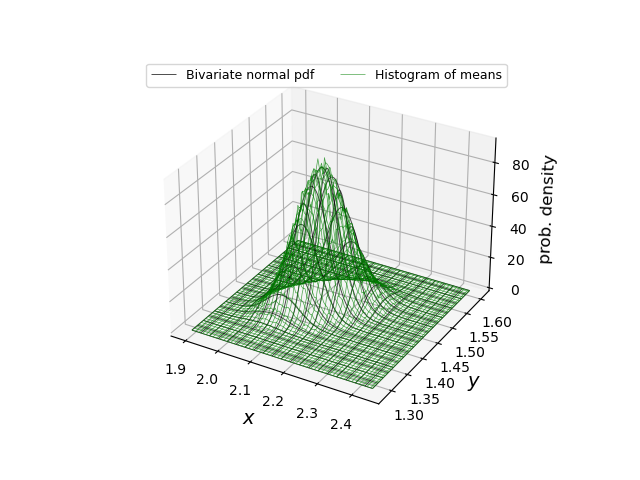

<IPython.core.display.Javascript object>


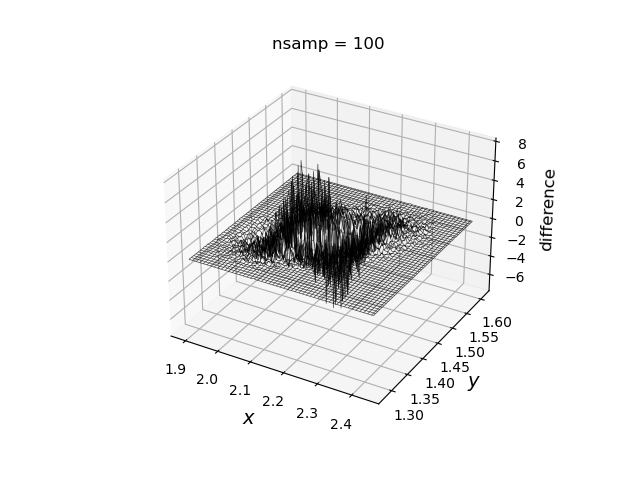

In [22]:
%matplotlib notebook
plot_histogram(1e6, 100)

<IPython.core.display.Javascript object>


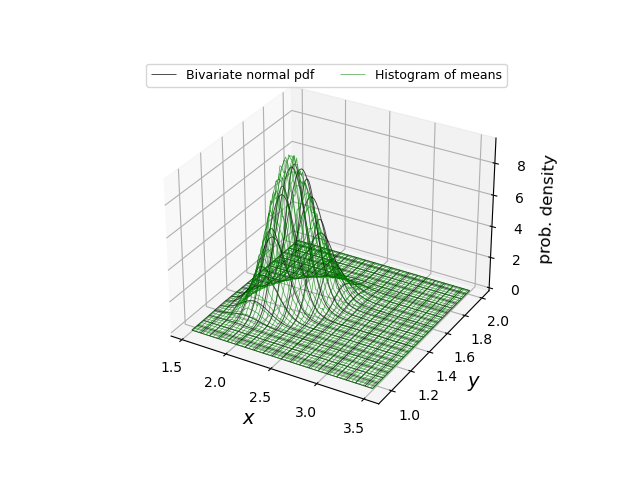

<IPython.core.display.Javascript object>


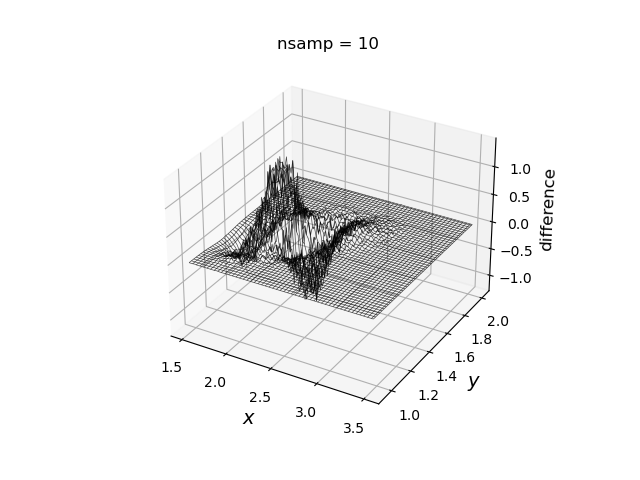

In [23]:
plot_histogram(1e6, 10)

<IPython.core.display.Javascript object>


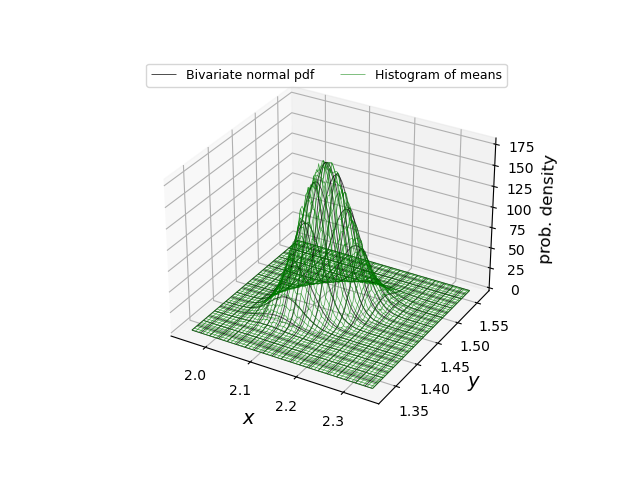

<IPython.core.display.Javascript object>


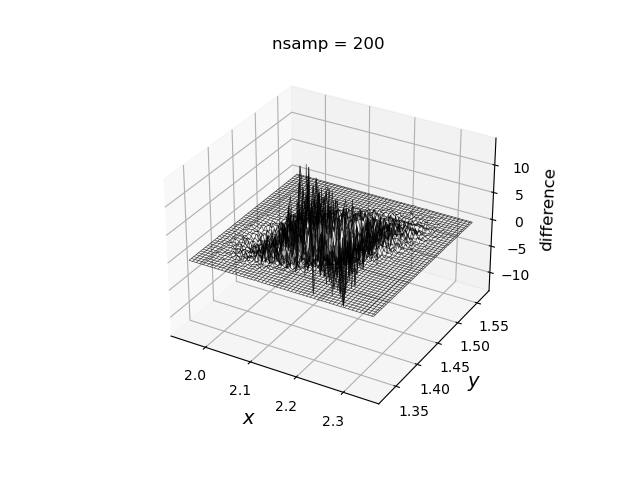

In [24]:
plot_histogram(1e6, 200)

*Conclusion:*
In the three examples above, only the value of nsamp was changed. This value denotes the number of pairs that are used for calculating the mean. The higher this number is, the closer the two peaks are to one another, and hence the flatter the difference plot looks. This is due to the central limit theorem. The higher the number of points used is (nsamp), the more the distribution will resemble a normal distribution. In this case, a bivariate normal distribution.

## Ep. 5: Estimating g by timing a pendulum

*Approach:*
First, the errors should be turned from time to gravity, by applying standard error propagation techniques. With these in hand, the normal distribution of the measurements can be created. The errors_g matrix should be reshaped in order to do this. With a uniform prior covering enough sigma space (making sure that the real g value is inside the range), we can apply Bayes' theorem as in the example in the software carpentry page, taking the product.

In [25]:
def g_to_T(g):
    '''Return period of 1 meter pendulum given a gravity'''
    T = 2*np.pi/np.sqrt(g)
    return T

def calc_posterior(periods, errors_T):
    '''Calculates posterior distribution of supplied periods and errors'''
    # gravity range to calculate posterior for
    g_i, g_f = 9.5,10.4
    # parameter array
    g_array = np.linspace(g_i, g_f, 1000)
    T_array = g_to_T(g_array)
    
    # prior is uniform distribution
    prior = 1/(g_f-g_i)
    
    # distribution of measurements from normal with error as sigma
    g_dist = sps.norm(loc=T_array.reshape(len(T_array),1), scale=errors_T)

    # in order to take product, we add logs in order to avoid problems of division by 0
    log_likel_prior = np.sum(np.log(g_dist.pdf(periods)), axis=1) + np.log(prior)
    likel_prior = np.exp(log_likel_prior-np.amax(log_likel_prior))
    
    likel_prior_int = spint.simpson(likel_prior, g_array, axis=0)

    posterior_pdf = likel_prior/likel_prior_int
    print('Gravity:', g_array[np.argmax(posterior_pdf)])
    plt.figure()
    plt.plot(g_array, posterior_pdf)
    plt.xlabel(r'gravity',fontsize=12)
    plt.ylabel(r'posterior density',fontsize=12)
    plt.show()

Gravity: 9.881081081081081


<IPython.core.display.Javascript object>


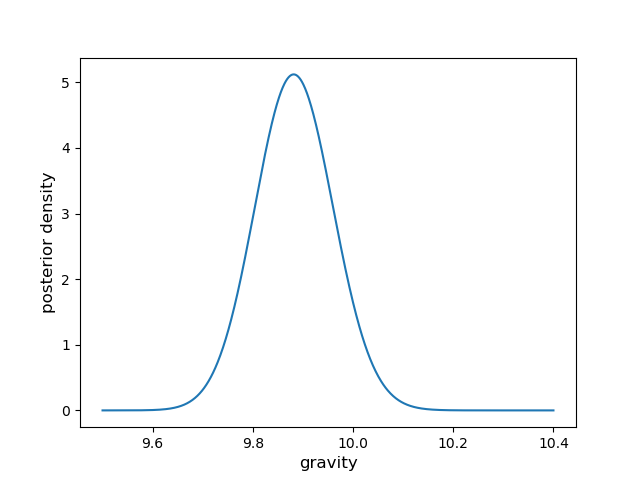

In [26]:
periods  = np.array([1.98, 2., 2.05, 1.99])
errors_p = np.array([0.02, 0.01, 0.03, 0.02])

calc_posterior(periods, errors_p)

Gravity: 9.833333333333334


<IPython.core.display.Javascript object>


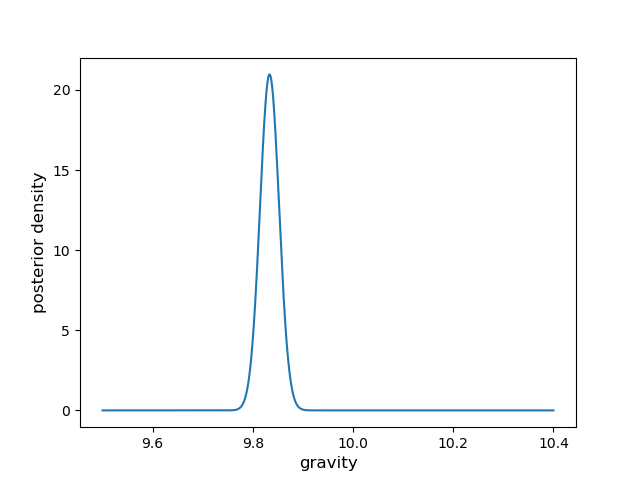

In [27]:
periods  = np.array([1.98, 2., 2.05, 1.99, 2.004])
errors_p = np.array([0.02, 0.01, 0.03, 0.02, 0.002])

calc_posterior(periods, errors_p)

*Conclusion:*
By adding a very precise measurement, the posterior distribution also becomes much more precise.